# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [10]:
df.shape

(10886, 19)

In [11]:
df.index[:5]

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [12]:
df.index.min(), df.index.max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

Набір даних містить 10886 рядків і 19 колонок. Дані мають погодинний рівень деталізації, тобто кожен рядок відповідає одній годині певного дня. Часовий індекс охоплює період з 1 січня 2011 року до 19 грудня 2012 року і дозволяє аналізувати сезонність, погодні фактори та поведінку користувачів у різні години доби.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


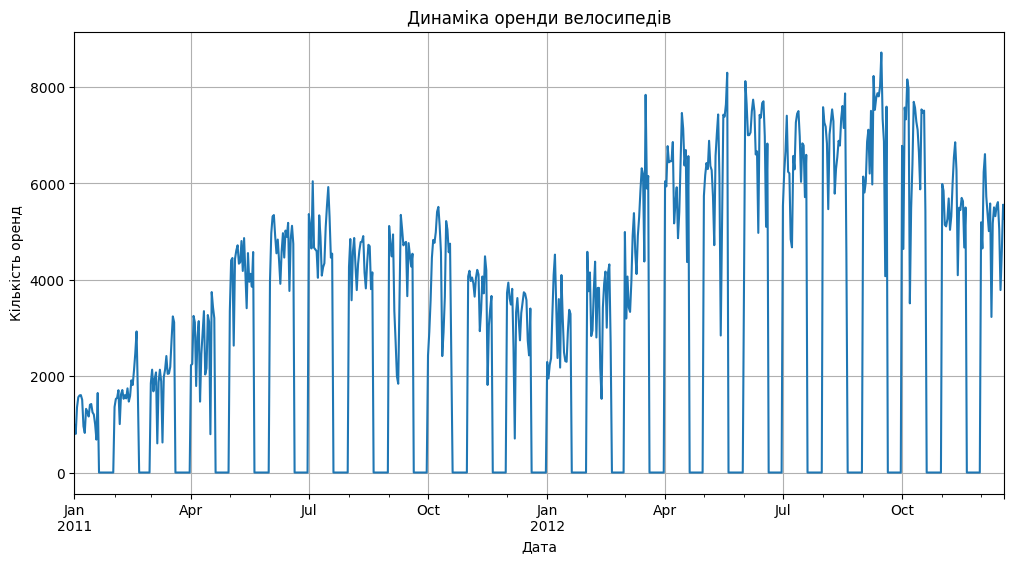

In [15]:
daily_count = df['count'].resample('D').sum()

daily_count.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='Дата',
    ylabel='Кількість оренд',
    grid=True
);

1. Різкі падіння до 0 на графіку видно регулярно. Найімовірніша причина цих заломів - дні без даних або помилки агрегування. Якщо в датасеті є дні без записів, то після resample вони стають 0. Серед інших причин можна виділити: дуже погану погоду, технічні збої в роботі сервісу, періоди свят. Щоб прибрати заломи можна 0 замінити на NaN.

2. На графіку видно загальне зростання попиту від 2011 до 2012 року. Вищі значення у 2012 році, коливання протягом року. Причини: популярність сервісу зростає, збільшується кількість користувачів.

3. Простежуються чіткі сезонні коливання: весна-літо - максимум оренд (погода сприяє велопрогулянкам), осінь - поступове зниження, зима - мінімум оренд.

4. Аномально низькі значення (0) можуть бути пов'язані з відсутністю даних, сильним дощем/холодом, технічними проблемами системи, святковими періодами. Серед причин аномально високих значень можна виділити: теплі сонячні дні, вихідні, туристичний сезон.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

In [22]:
season_avg = df.groupby('season')['count'].mean()

In [24]:
season_names = {
    1: 'Q1 (Winter)',
    2: 'Q2 (Spring)',
    3: 'Q3 (Summer)',
    4: 'Q4 (Autumn)'
}

season_avg.index = season_avg.index.map(season_names)

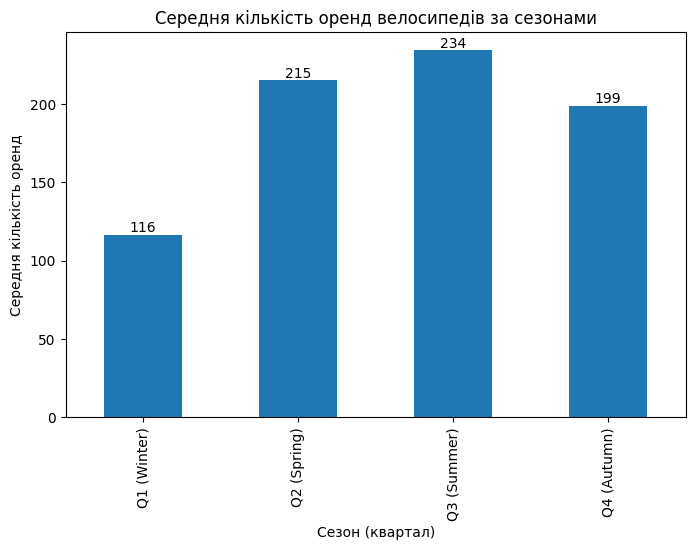

In [38]:
ax = season_avg.plot.bar(
    figsize=(8, 5),
    title='Середня кількість оренд велосипедів за сезонами',
    xlabel='Сезон (квартал)',
    ylabel='Середня кількість оренд'
)

ax.bar_label(ax.containers[0], fmt='%.0f');

1, 2. Найбільша середня кількість оренд велосипедів спостерігається у третьому кварталі (літо). Це пояснюється сприятливими погодними умовами, довшим світловим днем та більшою кількістю активностей на відкритому повітрі. Найменша кількість оренд припадає на перший квартал (зима): холодна погода та складні дорожні умови обмежують використання велосипедів.

3. Попит у найпопулярнішому сезоні приблизно у два рази перевищує попит у найменш популярному, що свідчить про виражену сезонність сервісу оренди велосипедів.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [39]:
monthly_avg = df.groupby('month')['count'].mean()

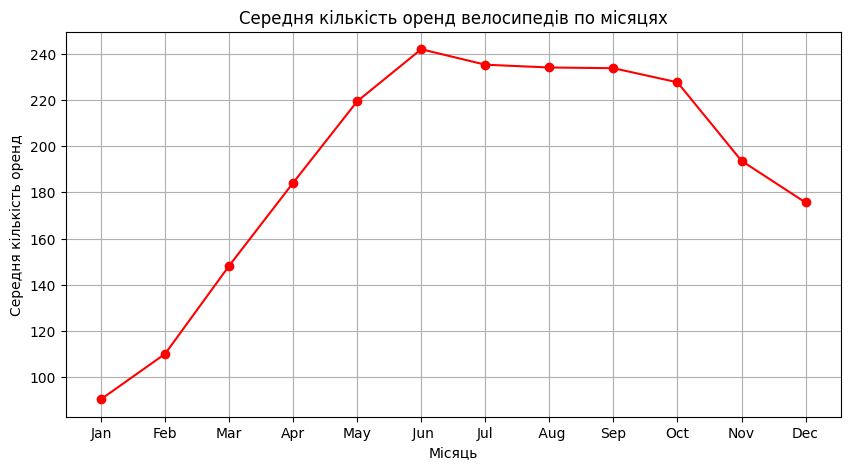

In [52]:
ax = monthly_avg.plot(
    figsize=(10, 5),
    marker='o',
    color='red',
    title='Середня кількість оренд велосипедів по місяцях',
    xlabel='Місяць',
    ylabel='Середня кількість оренд',
    grid=True
)

ax.set_xticks(range(12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May',' Jun', 'Jul',' Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

1. Найвищий попит на оренду велосипедів спостерігається у літні місяці з піком у червні, тоді як найнижчі показники припадають на зимовий період, особливо у січні.

2. Ця закономірність збігається з результатами попереднього завдання, де влітку фіксується найбільший попит на оренду велосипедів, а взимку - найменший.

3. Клімат відіграє ключову роль у використанні велосипедів: тепла та суха погода сприяє активному їх використанню, тоді як холод, опади та складні дорожні умови зменшують попит.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

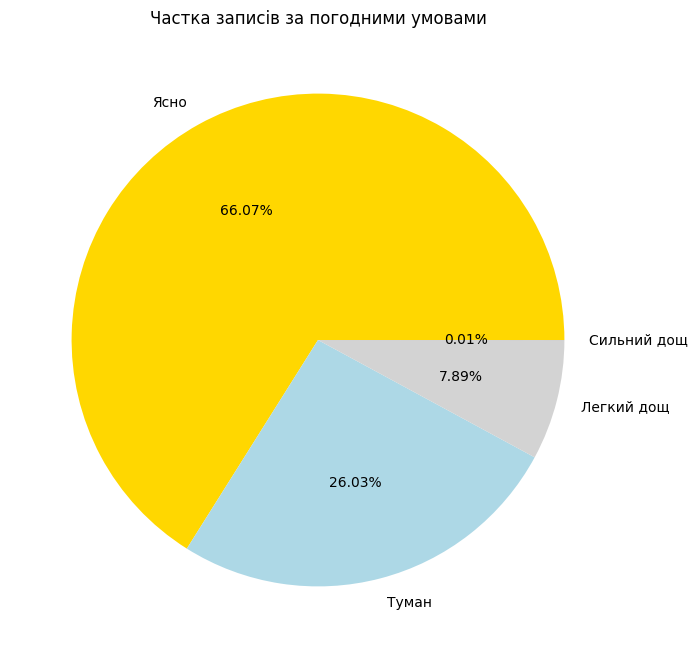

In [76]:
weather_counts = df['weather'].value_counts().sort_index()

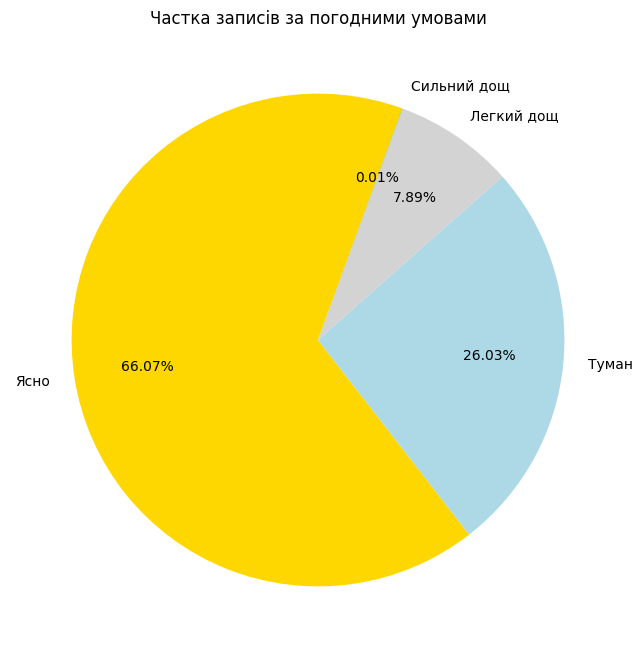

In [89]:
ax = weather_counts.plot.pie(
    figsize=(8, 8),
    autopct='%1.2f%%',
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    colors=['gold', 'lightblue', 'lightgrey', 'green'],
    startangle=70,
    labeldistance=1.1,
    pctdistance=0.7
)

ax.set_ylabel('')
ax.set_title('Частка записів за погодними умовами');

1. В датасеті переважає ясна погода, 66.07%.

2. Дні з сильним дощем зустрічаються дуже рідко - їх частка становить приблизно 0.01%.

3. Погодні умови суттєво впливають на попит на оренду велосипедів. Сприятлива ясна погода стимулює активне використання сервісу, тоді як дощ та складні дорожні умови значно зменшують кількість оренд.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [90]:
weather_names = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

df['weather_name'] = df['weather'].map(weather_names)

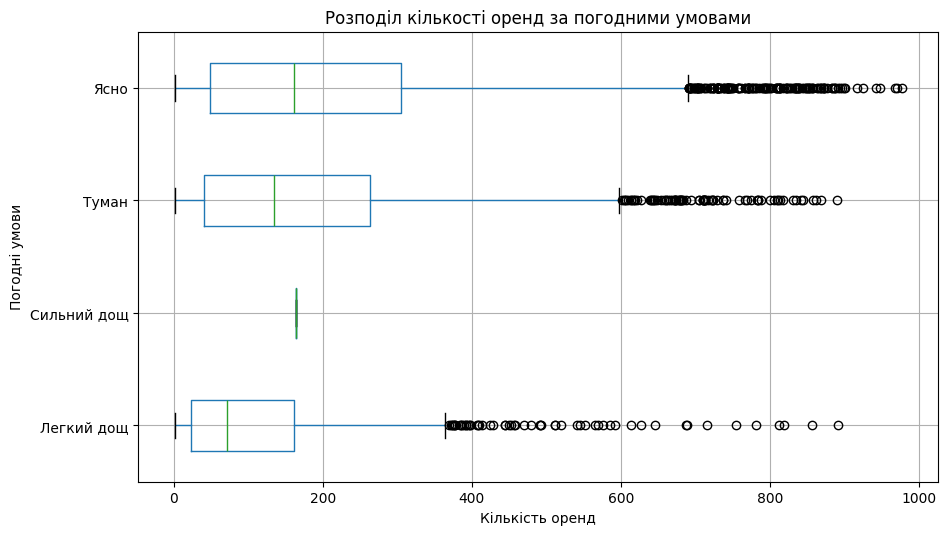

In [95]:
ax = df.boxplot(
    column='count',
    by='weather_name',
    vert=False,
    figsize=(10, 6)
)

ax.set_title('Розподіл кількості оренд за погодними умовами')
ax.set_xlabel('Кількість оренд')
ax.set_ylabel('Погодні умови')

plt.suptitle('');

1. Найбільший розкид значень кількості оренд спостерігається за ясної погоди. Це пояснюється тим, що у сприятливих умовах попит може сильно коливатись залежно від часу доби, дня тижня та інших факторів.

2. У даних є викиди, особливо за ясної погоди, де спостерігаються дуже високі значення оренд. Менша кількість викидів також є при тумані та легкому дощі. При сильному дощі значення стабільно низькі і викиди відсутні.

3. Найвище медіанне значення оренди також спостерігається за ясної погоди, що підтверджує, що комфортні погодні умови стимулюють активне використання велосипедів.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

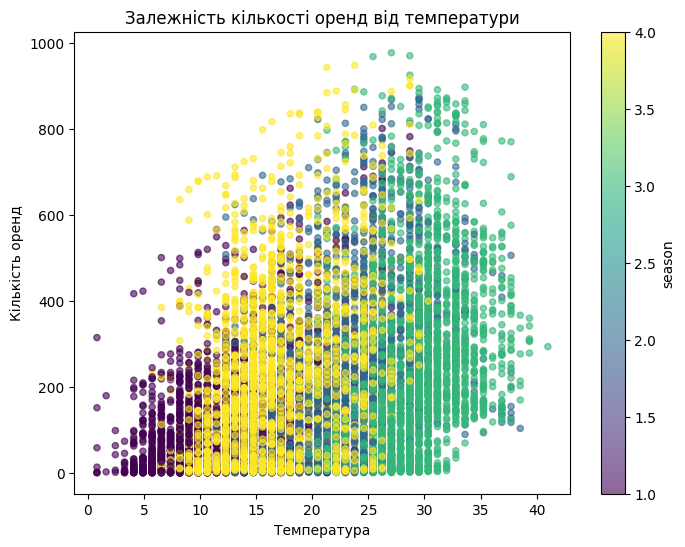

In [108]:
ax = df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    cmap='viridis',
    alpha=0.6,
    figsize=(8, 6)
)

ax.set_title('Залежність кількості оренд від температури')
ax.set_xlabel('Температура')
ax.set_ylabel('Кількість оренд');

Між температурою та кількістю оренд велосипедів існує позитивний зв’язок: зі зростанням температури попит збільшується. Найвищі значення оренд спостерігаються при помірно високій температурі (20-25 градусів), що відповідає комфортним умовам для велопрогулянок.

Однак залежність не є строго лінійною - при дуже низьких температурах попит мінімальний та при надмірно високих температурах також може знижуватися через дискомфорт. До того ж, попит залежить не лише від температури, а й від сезону, що видно з різних кластерів точок на графіку.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [111]:
weekly_avg = df.groupby('weekday')[['casual', 'registered']].mean()

In [113]:
order = ['Monday','Tuesday','Wednesday','Thursday',
         'Friday','Saturday','Sunday']

weekly_avg = weekly_avg.reindex(order)

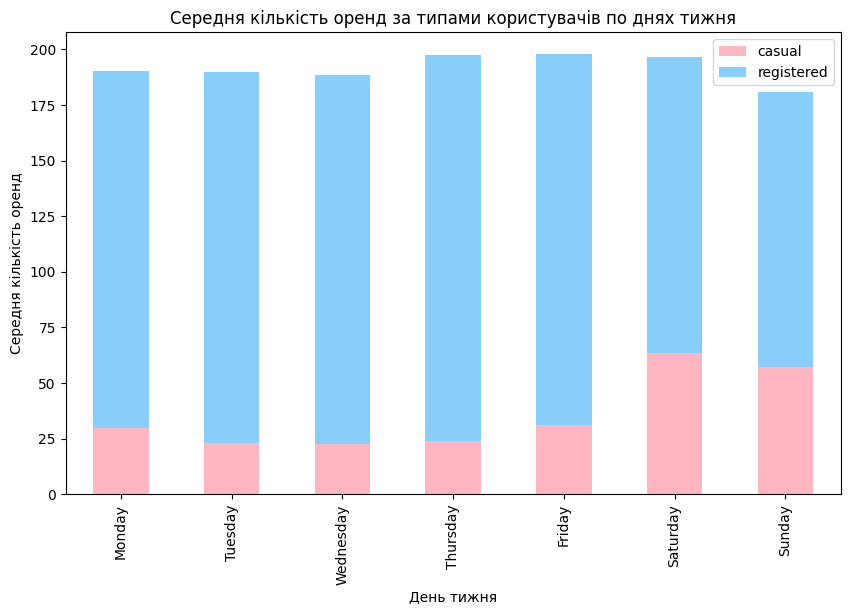

In [124]:
ax = weekly_avg.plot.bar(
    stacked=True,
    figsize=(10, 6),
    color=['lightpink', 'lightskyblue'],
    title='Середня кількість оренд за типами користувачів по днях тижня',
    xlabel='День тижня',
    ylabel='Середня кількість оренд',
    legend=['Випадкові', 'Зареєстровані']
);

1. Найбільша кількість оренд від зареєстрованих користувачів припадає на будні дні, що свідчить про регулярне використання сервісу для поїздок на роботу/навчання.
2. У вихідні дні активність зареєстрованих користувачів зменшується, а частка випадкових користувачів зростає. Це можна пояснити тим, що у вихідні велосипеди частіше використовують для відпочинку, прогулянок та туристичних поїздок.